### Consigna 1 -

Queremos demostrar que si se cumple la siguiente igualdad:

$$
(\mathbf{I - A})^{-1} = \mathbf{I} + \mathbf{A} + \mathbf{A^{2}} + \ldots + \mathbf{A^{n}} + \ldots
$$

Entonces vale que:

$$
\lim_{n \to \infty} \mathbf{A}^{n+1} = 0
$$

Definimos:

$$
S_n = \mathbf{I} + \mathbf{A} + \mathbf{A^2} + \ldots + \mathbf{A^n}
$$

Multiplicando a izquierda a ambos lados por $(\mathbf{I - A})$, tenemos:

$$
(\mathbf{I - A}) S_n = (\mathbf{I - A}) \left(\mathbf{I} + \mathbf{A} + \mathbf{A^2} + \ldots + \mathbf{A^n}\right)
$$

De aquí obtenemos:

$$
(\mathbf{I - A}) S_n = \mathbf{I} - \mathbf{A^{n+1}}
$$

Por lo tanto, podemos expresar:

$$
\mathbf{A^{n+1}} = \mathbf{I} - (\mathbf{I - A}) S_n
$$

Ahora calculemos $\lim_{n \to \infty} \mathbf{A}^{n+1}$

$$
\lim_{n \to \infty} \mathbf{A}^{n+1} = \lim_{n \to \infty} \mathbf{I} - (\mathbf{I - A}) S_n 
$$

Por álgebra de límites:

$$
\lim_{n \to \infty} \mathbf{A}^{n+1} = \lim_{n \to \infty} \mathbf{I} - (\lim_{n \to \infty}(\mathbf{I - A}) . \lim_{n \to \infty} S_n) 
$$

Como suponemos que $(\mathbf{I - A})^{-1} = \lim_{n \to \infty} S_n$, llegamos a:

$$
\lim_{n \to \infty} \mathbf{A}^{n+1} = \mathbf{I} - (\mathbf{I - A} . \mathbf{I - A})^{-1}) = 0
$$



### Consigna 2 -


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from funciones import *
from funcionesTP1 import *
import seaborn as sns

In [5]:
#Definimos las matrices:

data1 = [
    [0.186, 0.521, 0.014, 0.32, 0.134],
    [0.24, 0.073, 0.219, 0.013, 0.327],
    [0.098, 0.12, 0.311, 0.302, 0.208],
    [0.173, 0.03, 0.133, 0.14, 0.074],
    [0.303, 0.256, 0.323, 0.225, 0.257]
    ]

A1 = np.array(data1)

data2 = [
    [0.186, 0.521, 0.014, 0.32, 0.134],
    [0.24, 0.073, 0.219, 0.013, 0.327],
    [0.098, 0.12, 0.311, 0.302, 0.208],
    [0.173, 0.03, 0.133, 0.14, 0.074],
    [0.003, 0.256, 0.323, 0.225, 0.257]
    ]

A2 = np.array(data2)

In [6]:
#Definimos función para calcular los vectores:

def vector_generator(A, n):
    v = np.zeros(n)
    
    for i in range (n):
        A_elev = elevar_matriz(A, i+1 )
        v[i] = np.linalg.norm(A_elev, 2)
    
    return v

def elevar_matriz (A, n):
    res = np.eye(np.shape(A)[0])

    for i in range (n):
        res = res @ A

    return res 

In [10]:
#Generamos los vectores pedidos:
a1 = vector_generator(A1,250)

a2 = vector_generator(A2, 250)

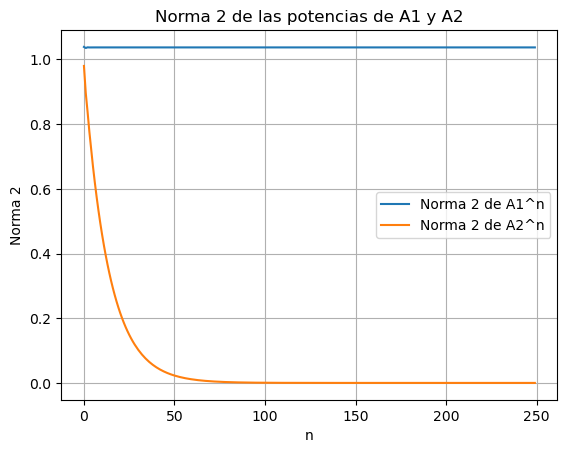

In [12]:
#Grafico:

plt.figure()
plt.plot(a1, label='Norma 2 de A1^n')
plt.plot(a2, label='Norma 2 de A2^n')
plt.xlabel('n')
plt.ylabel('Norma 2')
plt.title('Norma 2 de las potencias de A1 y A2')
plt.legend()
plt.grid()
plt.show()

### Consigna 3 -

In [15]:
#Primero definimos una función que realice el método de la potencia aplicando el método de Monte Carlo.

def metodo_potencia_MonteC(A,n):
    autovals_arr = np.zeros(n)

    for i in range (n):
        autovals_arr[i], _ = metodo_potencia(A)

    media = np.mean(autovals_arr)
    desvio_estandar = np.std(autovals_arr)

    return media, desvio_estandar


In [17]:
#Calculo Autovalores de A1 y A2

#A1:
a1, ds1 = metodo_potencia_MonteC(A1,250)
print(f'autovalor de módulo más grande de A1 y desvio estandar :{a1}, {ds1}')


#A2
a2, ds2 = metodo_potencia_MonteC(A2,250)
print(f'autovalor de módulo más grande de A2 y desvio estandar :{a2}, {ds2}')

#chequeo
#np.linalg.eigvals(A1)
#np.linalg.eigvals(A2)

autovalor de módulo más grande de A1 y desvio estandar :1.0000000881058169, 9.537086208114415e-07
autovalor de módulo más grande de A2 y desvio estandar :0.9276513068755394, 4.323979039779719e-06


$$
\begin{array}{|c|c|c|}
\hline
\textbf{Matriz} & \textbf{Autovalor de mayor mod} & \textbf{Desvio estandar} \\
\hline
A1 & 1.0 & 9.4 \times 10^{-7} \\
A2 & 0.93 & 4.1 \times 10^{-6} \\
\hline
\end{array}
$$

### Consigna 4 -


La ecuacion (4) es 

$$
\ (I-A)^{-1} = I + A + A^{2} + ... + A^{n} + ...
$$

In [22]:
def serie_de_potencias(A,n): 
    dim=np.shape(A)[0]
    
    v = np.zeros(n)
    e=np.zeros(n)

    L,U,P= calcularLU(np.eye(dim)-A)

    ImenosA_inversa=inversaLU(L, U, P)


    for i in range(n):
        serie= suma_potencias(A,i)
        v[i]=np.linalg.norm(serie, 2)
        e[i]=np.linalg.norm(serie-ImenosA_inversa,2)
    

    return v, e

    
    
def suma_potencias(A,n):
    dim=np.shape(A)[0]
    
    v = np.zeros(n+1)
    I = np.eye(dim)

    if n!=0:
        return elevar_matriz(A,n) + suma_potencias(A,n-1)
    else:
        return I


vA1,errorvA1=serie_de_potencias(A1,10)

vA2,errorvA2=serie_de_potencias(A2,10)

vA1_100,errorvA1_100=serie_de_potencias(A1,100)

vA2_100,errorvA2_100=serie_de_potencias(A2,100)

#print(errorvA2_100)



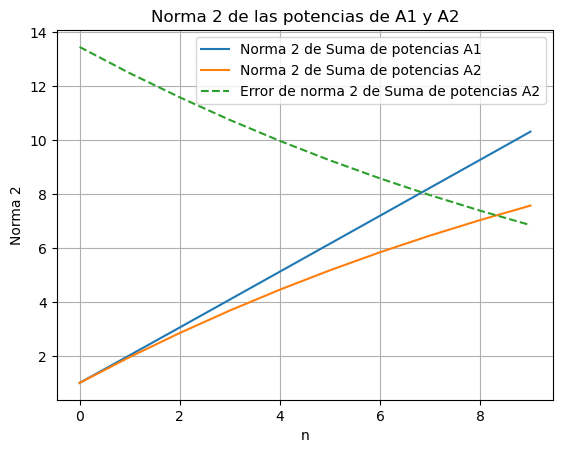

In [23]:
#Grafico para n=10:

plt.figure()
plt.plot(vA1, label='Norma 2 de Suma de potencias A1')
plt.plot(vA2, label='Norma 2 de Suma de potencias A2')
plt.plot(errorvA2, label='Error de norma 2 de Suma de potencias A2',linestyle="--")
plt.xlabel('n')
plt.ylabel('Norma 2')
plt.title('Norma 2 de las potencias de A1 y A2')
plt.legend()
plt.grid()
plt.show()

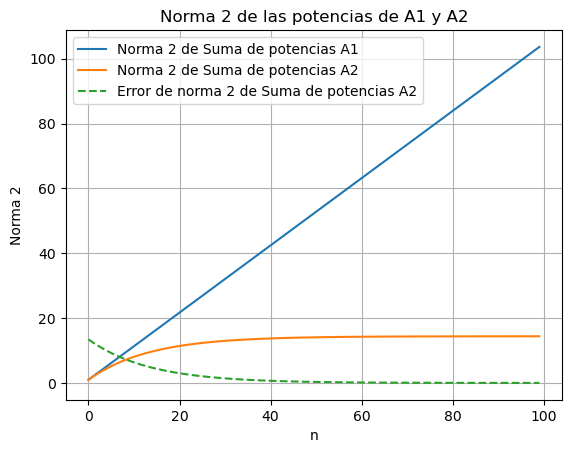

In [26]:
#Grafico para n=100:

plt.figure()
plt.plot(vA1_100, label='Norma 2 de Suma de potencias A1')
plt.plot(vA2_100, label='Norma 2 de Suma de potencias A2')
plt.plot(errorvA2_100, label='Error de norma 2 de Suma de potencias A2',linestyle="--")
plt.xlabel('n')
plt.ylabel('Norma 2')
plt.title('Norma 2 de las potencias de A1 y A2')
plt.legend()
plt.grid()
plt.show()

(b) Podemos obvservar que, mientras que A2 converge a un valor cercano a 17, la serie de potencias de A1 diverge. (c) Con los datos que tenemos, pareciese que la convergencia de la serie de potencias esta relacionado con que la norma de la matriz elevada a la n tienda a 0 cuando n tiende a infiinito y que el módulo de los autovectores sea menor a 1.


###     Consigna 5 -

#### Cálculo autovalores de APP y ASS.

In [31]:
#APP:

APP_arr = APP.to_numpy()

a_PP,ds= metodo_potencia_MonteC(APP_arr,250)

print(f'Mayor autovalor de APP: {a_PP}')

#ASS

ASS_arr = ASS.to_numpy()

a_SS,ds= metodo_potencia_MonteC(ASS_arr,250)

print(f'Mayor autovalor de ASS: {a_SS}')

#chequeo
#np.linalg.eigvals(APP)
#np.linalg.eigvals(ASS)

Mayor autovalor de APP: 0.28265627117370823
Mayor autovalor de ASS: 0.26326705430332226


#### Calculamos vectores con la norma de la matriz elevada a i en la posición i y lo graficamos

In [34]:
a1 = vector_generator(APP_arr,250)

a2 = vector_generator(ASS_arr, 250)

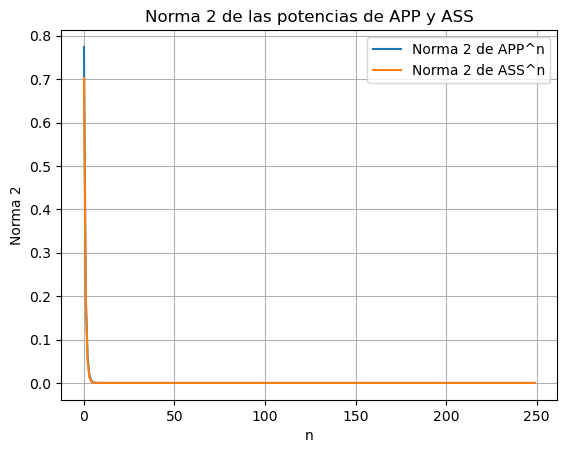

In [36]:
#Grafico de Normas.
plt.figure()
plt.plot(a1, label='Norma 2 de APP^n')
plt.plot(a2, label='Norma 2 de ASS^n')
plt.xlabel('n')
plt.ylabel('Norma 2')
plt.title('Norma 2 de las potencias de APP y ASS')
plt.legend()
plt.grid()
plt.show()

Se puede observar que las las normas de las matrices elevadas tienden a 0 a medida que aumenta el n y el módulo de los autovectores es menor a 1. Por lo tanto,
según el argumento dado en el Punto 4, la serie de potencias convergerá.

#### Ahora calculamos y graficamos la serie de potencias.

In [40]:
#Primero calculamos los vectores con la serie de potencia hasta n en cada coordenada.

vAPP_100,errorvAPP_100=serie_de_potencias(APP_arr,100)

vASS_100,errorvASS_100=serie_de_potencias(ASS_arr,100)

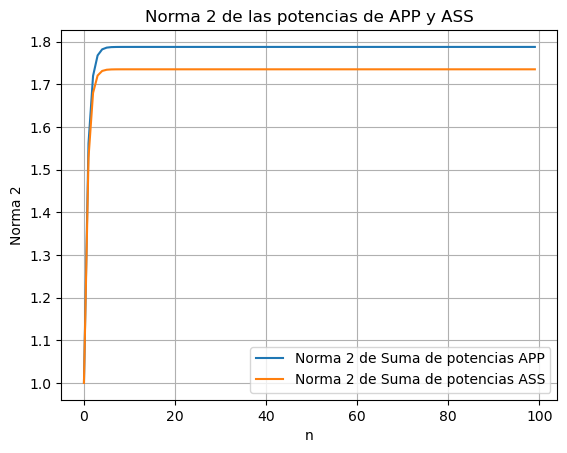

In [41]:
#Grafico:

plt.figure()
plt.plot(vAPP_100, label='Norma 2 de Suma de potencias APP')
plt.plot(vASS_100, label='Norma 2 de Suma de potencias ASS')
plt.xlabel('n')
plt.ylabel('Norma 2')
plt.title('Norma 2 de las potencias de APP y ASS')
plt.legend()
plt.grid()
plt.show()

Se puede observar en el gráfico que la suma de potencias converge.

### Consigan 6 -

$$
E_{n} = \begin{bmatrix}
1 - \frac{1}{n} & \frac{-1}{n} & \cdots & \frac{-1}{n} \\
\frac{-1}{n} & 1-\frac{1}{n} & \cdots & \frac{-1}{n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{-1}{n} & \frac{-1}{n} & \cdots & 1-\frac{1}{n}
\end{bmatrix} \in \mathbb{R}^{n \times n}
$$

$\underline{\text{Ítem a:}}$

Notamos que $E_{n}$ es una matriz con todos sus elementos negativos, salvo los de la diagonal:

$$
E_{n}z =
\begin{bmatrix}
1 - \frac{1}{n} & \frac{-1}{n} & \cdots & \frac{-1}{n} \\
\frac{-1}{n} & 1 - \frac{1}{n} & \cdots & \frac{-1}{n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{-1}{n} & \frac{-1}{n} & \cdots & 1 - \frac{1}{n}
\end{bmatrix}
\begin{bmatrix}
z_{1} \\
z_{2} \\
\vdots \\
z_{n}
\end{bmatrix} =
\begin{bmatrix}
x_{1} \\
x_{2} \\
\vdots \\
x_{n}
\end{bmatrix}
$$

$$
x_{1} = \left(1 - \frac{1}{n}\right) z_{1} - \frac{1}{n} \left(\sum_{i=2}^{n} z_{i}\right)
$$

$$
x_{2} = -\frac{1}{n} z_{1} + \left(1 - \frac{1}{n}\right) z_{2} - \frac{1}{n} \left(\sum_{i=3}^{n} z_{i}\right)
$$

$$
x_{i} = -\frac{1}{n} \left(\sum_{j=1}^{i-1} z_{j}\right) + \left(1 - \frac{1}{n}\right) z_{i} - \frac{1}{n} \left(\sum_{j=i+1}^{n} z_{j}\right) = z_{i} - \frac{1}{n} \left(\sum_{j=1}^{n} z_{j}\right)
$$

Luego, el promedio de los elementos de $E_{n}z$ es:

$$
\frac{\sum_{i=1}^{n}\left(z_{i} - \frac{\sum_{j=1}^{n} z_{j}}{n}\right)}{n} =
$$

$$
\frac{\sum_{i=1}^{n} z_{i} - \sum_{i=1}^{n} \left(\frac{\sum_{j=1}^{n} z_{j}}{n}\right)}{n} =
$$

$$
\frac{\sum_{i=1}^{n} z_{i} - \sum_{i=1}^{n} \left(\frac{1}{n}\right) \sum_{j=1}^{n} z_{j}}{n} =
$$

$$
\frac{\sum_{i=1}^{n} z_{i} - \sum_{i=1}^{n} z_{i}}{n} = \frac{0}{n}=0
$$

Sea $A$ una matriz cualquiera, $A \in \mathbb{R}^{n \times n}$.

Ahora vemos qué efecto tiene $E_{n}A$ sobre $A$:

$$
E_{n}A = 
\begin{bmatrix}
1 - \frac{1}{n} & \frac{-1}{n} & \cdots & \frac{-1}{n} \\
\frac{-1}{n} & 1 - \frac{1}{n} & \cdots & \frac{-1}{n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{-1}{n} & \frac{-1}{n} & \cdots & 1 - \frac{1}{n}
\end{bmatrix}
\begin{bmatrix}
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{n1} & a_{n2} & \cdots & a_{nn}
\end{bmatrix}
$$



Como vimos anteriormente:

$(E_{n}A)_{ij} =  a_{ij} - \frac{1}{n} \left(\sum_{i=1}^{n} a_{ij}\right)$

Por lo tanto, al realizar $E_{n}A$ se obtiene la matriz A restandole la media por columna a cada columna.


$\underline{\text{Ítem b:}}$

Notamos que:

$\lambda = 1$ es un autovalor, pues:
$$
E_{n} - I = \begin{bmatrix}
\frac{-1}{n} & \frac{-1}{n} & \cdots & \frac{-1}{n} \\
\frac{-1}{n} & \frac{-1}{n} & \cdots & \frac{-1}{n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{-1}{n} & \frac{-1}{n} & \cdots & \frac{-1}{n}
\end{bmatrix}
$$

Tomamos $\{d_2, \ldots, d_n\}$ como una base de $\langle e \rangle^{\perp}$, tal que
$$
d_{i} = \begin{bmatrix}
-1\\
0\\
\vdots\\
1\\
0\\
\vdots\\
0
\end{bmatrix} \quad \longrightarrow \text{ posición } i,
$$
para $2 \leq i \leq n$.

Luego, para cada $i$:
$$
(E_{n} - I)d_{i} = 
\begin{bmatrix}
\frac{-1}{n} & \frac{-1}{n} & \cdots & \frac{-1}{n} \\
\frac{-1}{n} & \frac{-1}{n} & \cdots & \frac{-1}{n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{-1}{n} & \frac{-1}{n} & \cdots & \frac{-1}{n}
\end{bmatrix} 
\begin{bmatrix}
-1\\
0\\
\vdots\\
1\\
0\\
\vdots\\
0
\end{bmatrix} = 
\begin{bmatrix}
\frac{1}{n} - \frac{1}{n} \\
\frac{1}{n} - \frac{1}{n} \\
\vdots \\
\frac{1}{n} - \frac{1}{n}
\end{bmatrix} = 
\begin{bmatrix}
0\\
0\\
\vdots\\
0
\end{bmatrix}
$$

$\Rightarrow E_{\lambda=1} = \langle d_2, \ldots, d_n \rangle$, espacio de dimensión $n-1$.

Para $\lambda = 0$, tenemos:
$$
E_{n} 
\begin{bmatrix}
1\\
1\\
\vdots\\
1
\end{bmatrix} =
\begin{bmatrix}
1 - \frac{1}{n} \sum_{i=1}^{n} 1 \\
1 - \frac{1}{n} \sum_{i=1}^{n} 1 \\
\vdots \\
1 - \frac{1}{n} \sum_{i=1}^{n} 1
\end{bmatrix} =
\begin{bmatrix}
0\\
0\\
\vdots\\
0
\end{bmatrix}
$$

$\Rightarrow E_{\lambda=0} = \langle (1, 1, \ldots, 1) \rangle$, espacio de dimensión 1.

$\therefore$ Tenemos una base de autovectores de $\mathbb{R}^n$: $B = \{e, d_2, \ldots, d_n\}$, con $e$ asociado a $\lambda = 0$ y $d_{2}, \ldots, d_{n}$ asociados a $\lambda = 1$.





        


$\underline{\text{Ítem c:}}$



Notar que:

  $\forall a_{ij} \in E_{n}, a_{ij}=a_{ji}$

   $\Rightarrow E_{n}=E_{n}^{t}$

   
Luego, $E_{n}$ es una matriz simétrica

Resta ver que:

 $E_{n}$ es un proyector 

 $\Leftrightarrow E_{n}^{2}=E_{n}$

 volviendo a la definición del enunciado 
 $$ E_{n} = I_{n} - \frac{1}{n} ee^{T} $$

 Donde $I_{n} \in \mathbb{R}^{n\times n}$ y $e\in \mathbb{R}^{n}$ un vector columna de todos unos

 Luego, $E_{n}^{2}=(I_{n} - \frac{1}{n} ee^{T})(I_{n} - \frac{1}{n} ee^{T})$

 $$
 = I_{n}^{2}- \frac{1}{n} ee^{T} - \frac{1}{n} ee^{T} + (- \frac{1}{n} ee^{T})^{2}
 $$

 llamo $B=ee^{T}\in \mathbb{R}^{n\times n}$

 $$
 =I_{n}- \frac{1}{n} B - \frac{1}{n} B + (- \frac{1}{n} B)^{2}
 $$

 $$
 = I_{n}- \frac{2}{n} B  + (- \frac{1}{n} B)^{2}
 $$

 Como $B= \begin{bmatrix}
1 & \cdots & 1 \\
1  & \cdots & 1 \\
\vdots  & \ddots & \vdots \\
1  & \cdots & 1
\end{bmatrix}$, $BB=B^{2}=\begin{bmatrix}
n & \cdots & n \\
n  & \cdots & n \\
\vdots  & \ddots & \vdots \\
n  & \cdots & n
\end{bmatrix}$

Retomando, 
$$
 = I_{n}- \frac{2}{n} B  + (- \frac{1}{n} B)^{2}= I_{n}- \frac{2}{n} B  + \frac{1}{n^{2}} nB
 $$

 $$
 =I_{n}- \frac{1}{n} B=I_{n} - \frac{1}{n} ee^{T}=E_{n}
 $$

  Como queriamos.


  Y como además es simétrica, es un proyector ortogonal

$\underline{\text{Ítem d:}}$

i) Falso, no es una matriz ortogonal.

Contraejemplo:

$$
E_{2}=\begin{bmatrix}
\frac{1}{2} & -\frac{1}{2} \\
-\frac{1}{2} & \frac{1}{2} \\
\end{bmatrix}
$$
si $E_{2}$ fuese ortogonal, $E_{2}^{2}=I$
pero, $E_{2}^{2}=\begin{bmatrix}
\frac{1}{2} & -\frac{1}{2} \\
-\frac{1}{2} & \frac{1}{2} \\
\end{bmatrix}$


ii)Verdadero, pues $E_{n}\begin{bmatrix}
1\\
1\\
\vdots\\
1\\
\end{bmatrix}= \vec{0}$



iii)Falso, no es definida positiva. 

Contraejemplo
$E_{2}$

$$
\begin{bmatrix}
\frac{1}{2} & \frac{1}{2}\\
\end{bmatrix}
\begin{bmatrix}
\frac{1}{2} & -\frac{1}{2} \\
-\frac{1}{2} & \frac{1}{2} \\
\end{bmatrix}
\begin{bmatrix}
\frac{1}{2} \\
 \frac{1}{2}\\
\end{bmatrix}
=\begin{bmatrix}
\frac{1}{2} & \frac{1}{2}\\
\end{bmatrix}
\begin{bmatrix}
0 \\
0\\
\end{bmatrix}= \vec{0}
$$



iv)Verdadero; pues

traza($E_{n}$)=$\sum_{1}^{n}(1-\frac{1}{n})$=$\sum_{1}^{n}1-\sum_{1}^{n}\frac{1}{n}$=$n-1$




### Consigna 7 -

#### Primero normalizamos la matriz ASS y calculamos la matriz de covarianzas.

In [53]:
#Funcion para generar E_n:

def En_generator(n):
    E_n = np.eye(n) - np.ones((n, n)) * (1/n) 

    return E_n

E40 = En_generator(40)

In [55]:
#Normalizamos y calculamos cov.

ASSnorm = E40 @ ASS_arr

C = ASSnorm.T @ ASSnorm /(40-1)

#### Calculamos los dos primeros autovectores utilizando el Algoritmo de Hotelling.

In [58]:
def Hotelling (A, e):
    a1, v1 = metodo_potenciaH(A, e)

    A_prima = A - a1 * (v1 @ v1.T)
    a2, v2 = metodo_potenciaH(A_prima, e)

    return a1, v1, a2, v2

#### Ahora utilizamos la función Hotelling en C.

In [61]:
lambda1, v1, lambda2, v2 = Hotelling(C, 0.9999)

print(f'Mayor autovalor de C: {lambda1}')
#print(f'Autovector asociado al mayor autovalor de C: {v1}')
print(f'Segundo mayor autovalor de C: {lambda2}')
#print(f'Autovector asociado al segundo mayor autovalor de C: {v2}')

#Chequeo:
#print(np.linalg.eigvals(C))
#print(np.linalg.eigvals(C - lambda1 * (v1 @ v1.T)))

Mayor autovalor de C: 0.010395205448565792
Segundo mayor autovalor de C: 0.0030120160662556856


### Consigna 8 -

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


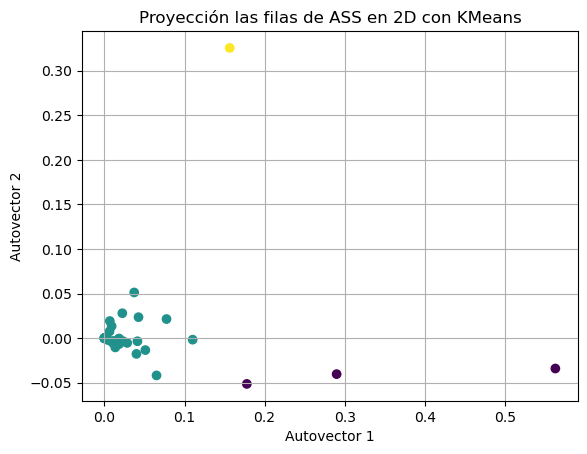

In [64]:
from sklearn.cluster import KMeans


#usamos los autovectores calculados en el punto anterior
autovector1ASS = v1
autovector2ASS = v2

# los convertimos en una matriz de 2x40
matriz2cols = np.column_stack((autovector1ASS, autovector2ASS))

ceros =np.zeros((40,38))
#llamo V a la matriz que tiene como primeras columas a los autovectores y el resto 0
V = np.column_stack((matriz2cols, ceros))
# proyectamos ASS
proyeccionASS = ASS_arr @ V
#print (proyeccion)

# Aplicamos KMeans para agrupar los datos en 3 clusters
kmeans = KMeans(n_clusters=3, random_state=4)
clusters = kmeans.fit_predict(proyeccionASS)
#pasamos matriz a df
# Hacer zoom a cada cluster y mostrar gráficos separados

# Graficamos los resultados
plt.grid()
scatter = plt.scatter(proyeccionASS[:, 0], proyeccionASS[:, 1], c=clusters,)

plt.title("Proyección las filas de ASS en 2D con KMeans")
plt.xlabel("Autovector 1")
plt.ylabel("Autovector 2")

plt.show()

    

#### Consigna 9 -

$H=A(I-A)^{-1}$

La suma de potencias se define como:
$$ (I-A)^{-1}=I+A+A^{2}+A^{3}+...+A^{n}+...$$
$\Rightarrow $ reemplazando en H,

$$H=A(I-A)^{-1}=A(I+A+A^{2}+A^{3}+...+A^{n}+...)$$
$$ \Rightarrow H=A+A^{2}+A^{3}+A^{4}+...+A^{n+1}+...$$
Luego, $$H=(I-A)^{-1}-I$$

### CONSIGNA 10

#### Repetimos el analisis del punto 8) con la matriz H

In [70]:

def H_generator(A):
    I=np.eye(40)
    L,U,P = calcularLU(I-A)

    serie= inversaLU(L,U,P)

    H = A@serie 

    return H

H=H_generator(ASS_arr)

In [72]:
#Buscamos los autovectores de H

Hnorm = E40 @ H

lambda1, v1H, lambda2, v2H = Hotelling(Hnorm, 0.9999)

print(f'Mayor autovalor de H: {lambda1}')
#print(f'Autovector asociado al mayor autovalor de C: {v1}')
print(f'Segundo mayor autovalor de C: {lambda2}')
#print(f'Autovector asociado al segundo mayor autovalor de C: {v2}')


Mayor autovalor de H: 0.24306679577315274
Segundo mayor autovalor de C: 0.16786283585335296


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


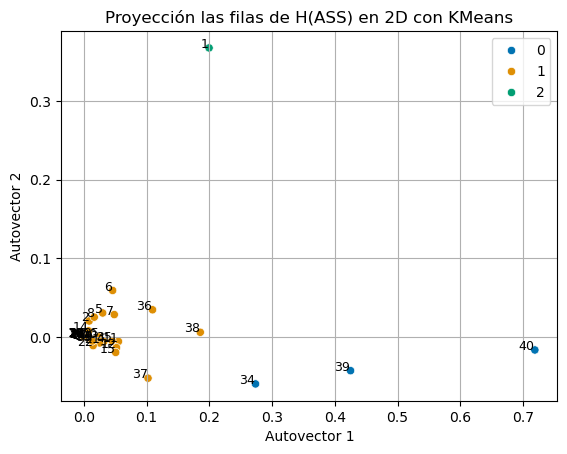

In [74]:
#Usamos los autovectores encontrados
autovector1 = v1H
autovector2 = v2H


ceros =np.zeros((40,38))
#llamo V a la matriz que tiene como primeras columas a los autovectores y el resto 0
V = np.column_stack((matriz2cols, ceros))
# proyectamos ASS
proyeccion = H @ V
#print (proyeccion)

# Aplicamos KMeans para agrupar los datos en 3 clusters
kmeans = KMeans(n_clusters=3, random_state=4)
clusters = kmeans.fit_predict(proyeccion)

#pasamos matriz a df
df = pd.DataFrame(proyeccion)
df.columns = ['Columna1', 'Columna2'] + [f'Columna{i+3}' for i in range(38)]


# Graficamos los resultados
#scatter = plt.scatter(proyeccion[:, 0], proyeccion[:, 1], c=clusters)
for i in range(df.shape[0]):
    plt.text(df['Columna1'][i], df['Columna2'][i], f'{i+1}', fontsize=9, ha='right')
sns.scatterplot(data=df,x="Columna1",y="Columna2",hue=clusters,palette="colorblind")
plt.title("Proyección las filas de H(ASS) en 2D con KMeans")
plt.xlabel("Autovector 1")
plt.ylabel("Autovector 2")
plt.grid()


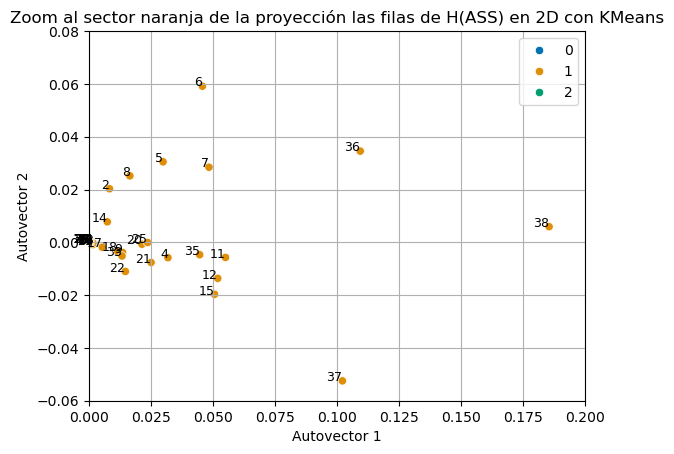

In [76]:
#Hago zoom en el grafico cluster NARANJA

for i in range(1,df.shape[0]-7):
    plt.text(df['Columna1'][i], df['Columna2'][i], f'{i+1}', fontsize=9, ha='right')

for i in range(34,38):
    plt.text(df['Columna1'][i], df['Columna2'][i], f'{i+1}', fontsize=9, ha='right')
sns.scatterplot(data=df,x="Columna1",y="Columna2",hue=clusters,palette="colorblind")
plt.title("Zoom al sector naranja de la proyección las filas de H(ASS) en 2D con KMeans")
plt.xlabel("Autovector 1")
plt.ylabel("Autovector 2")
plt.xlim(0,0.2)
plt.ylim(-0.06,0.08)
plt.grid()

Hacemos una tabla para mostrar algunos sectores que se pueden ver en el gráfico:

$$
\begin{array}{|c|c|c|}
\hline
\textbf{Indice} & \textbf{Sector} & \textbf{Cluster} \\
\hline
1 & Agricultura & verde\\
5 & Carnes & naranja  \\
6 & Molinería, panaderia & naranja  \\
15 & Papel & naranja  \\
34 & Electricidad \hspace{0.2cm} y \hspace{0.2cm} gas & azul  \\
36 & Transporte & naranja  \\
37 & Correo & naranja \\
38 & Finanzas \hspace{0.2cm} y \hspace{0.2cm} seguros & naranja  \\
39 & Servicios\hspace{0.2cm}a\hspace{0.2cm}empresas & azul   \\
40 & Otros\hspace{0.2cm}servicios & azul  \\
\hline
\end{array}
$$

##### Análisis:

Notamos que la mayoría de los sectores se encuentran en el cluster naranja. Podemos interpretar que a este cluster pertenecen aquellos productos que no precisan grandes proporciones de los demas para producirse. A este cluster pertenecen sectores que su fila de producción es igual a 0 en todas las posiciones, por ejemplo el sector 3 (minería). En el gráfico se puede notar que hay puntos superpuestos en 0. No podemos establecer una relación estrecha entre los sectores que peretenecen a este cluster (en términos de las características de los productos) ya que, por ejemplo, a este cluster pertenece el sector de trigo y pasta y tambien el sector de finanzas y seguros.

El cluster azul contiene 3 sectores, los cuales representan respectivamente a los sectores de la electricidad y el gas, servicios a empresas de todo tipo y otros servicios. 
Estos sectores, pese a estar en un mismo cluster, se encuentran alejados, lo que indica que no se encuentran fuertemente relacionados entre si, aunque se puede establecer una relación entre ellos, ya que, por ejemplo, todos los sectores necesitan en mayor o menor medida de la electricidad. Estos sectores tienen una producción mayor a los del cluster celeste aunque no alcanzan los niveles del sector 1, que se encuentra señalado en verde en el gráfico y representa al sector agricultura y forestal, el cual da empleo a más del 18% de la población economicamente activa del país.

### CONSIGNA 11 -


#### Calculemos las distancias al origen de cada punto de ASS.

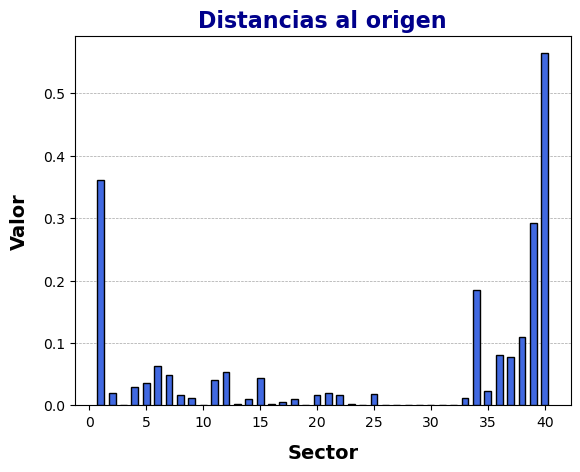

In [82]:
distancias_0 = np.linalg.norm(proyeccionASS,axis=1)

#Graficamos las distancias a 0:

fig, ax = plt.subplots()

bars = ax.bar(range(1, len(distancias_0)+1), distancias_0, color='royalblue', edgecolor='black', width=0.6, zorder=3)

ax.set_xlabel('Sector', fontsize=14, color='black', labelpad=10, weight='bold', zorder=5)
ax.set_ylabel('Valor', fontsize=14, color='black', labelpad=10, weight='bold', zorder=5)
ax.set_title('Distancias al origen', fontsize=16, color='darkblue', weight='bold', zorder=5)
ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5, alpha=0.7, color='gray')

In [84]:
indice_max = np.argmax(distancias_0)
indice_min = np.argmin(distancias_0)

print(f'La distancia max es {distancias_0[indice_max]}, de indice {indice_max + 1}.')

print(f'La distancia min es {distancias_0[indice_min]}, de indice {indice_min + 1}.')

La distancia max es 0.5638749860894552, de indice 40.
La distancia min es 0.0, de indice 3.


El sector 40 corresponde a "Otros servicios" de todo tipo y el 2 a "Minería (no energía)"

#### Graficamos la produccion de ASS y H para los sectores con distancia min y max.

In [88]:
#ASS:
sector_minASS = ASSnorm[2] #Caza y pesca
sector_maxASS = ASSnorm[39] # Servicios a empresas de todo tipo


#H:
sector_minH = Hnorm[2]
sector_maxH = Hnorm[39]

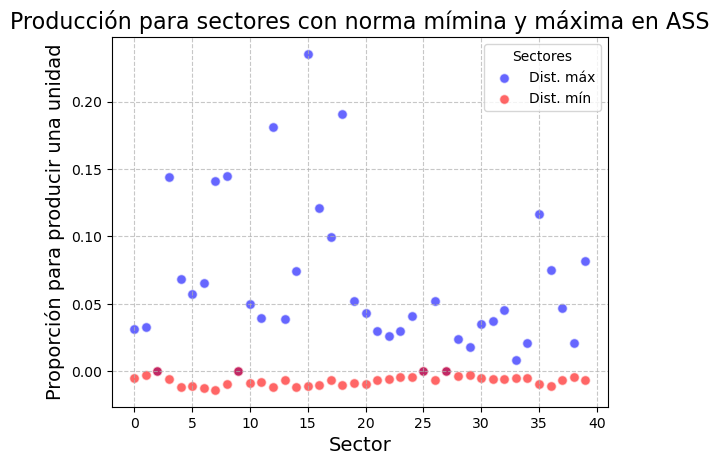

In [90]:
#Graficamos la fila maxima y minima de A:


plt.scatter(range(len(sector_maxASS)),sector_maxASS, c='blue',label='Dist. máx', alpha=0.6, edgecolors='w', s=50)
plt.scatter(range(len(sector_minASS)),sector_minASS, c='red',label='Dist. mín', alpha=0.6, edgecolors='w', s=50)

plt.title('Producción para sectores con norma mímina y máxima en ASS', fontsize=16)
plt.xlabel('Sector', fontsize=14)
plt.ylabel('Proporción para producir una unidad', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Sectores')
plt.show()

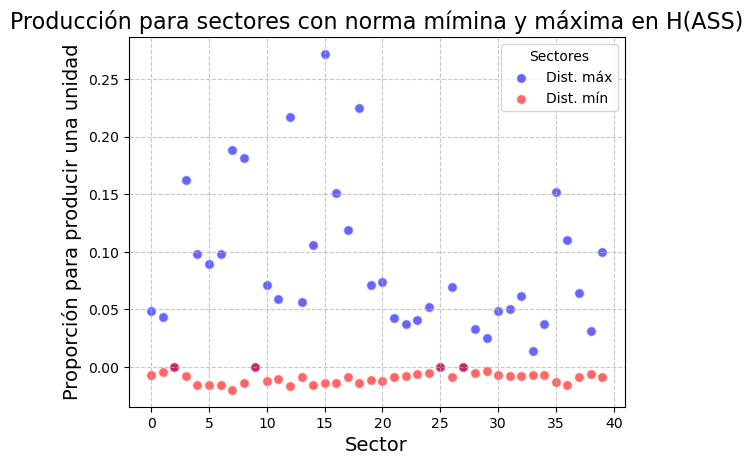

In [92]:
#Ahora para H:


plt.scatter(range(len(sector_maxH)),sector_maxH, c='blue',label='Dist. máx', alpha=0.6, edgecolors='w', s=50)
plt.scatter(range(len(sector_minH)),sector_minH, c='red',label='Dist. mín', alpha=0.6, edgecolors='w', s=50)

plt.title('Producción para sectores con norma mímina y máxima en H(ASS)', fontsize=16)
plt.xlabel('Sector', fontsize=14)
plt.ylabel('Proporción para producir una unidad', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Sectores')
plt.show()

Para el análisis de los sectores usamos las matrices de produccion y H normalizadas, ya que utilizar la matriz normal nos dejaba al sector rojo como una función constantemente 0. 
Podemos obvservar en el grafico como el sector rojo esta muy cerca del origen, mientras que el azul tiene puntos lejanos al 0. Esto se debe que el sector azul depende fuertemente de la producción de de los demas sectores. Siendo esta area de producción "otros servicios" nos lleva a pensar que depende de muchos tipos de empresas diferentes, por lo cual la producción de los demás sectores es significativa para el funcionamiento de este. Por otro lado, el sector rojo "minería (energía)" no necesita de los demas sectores. Deducimos que El Salvador no tiene una gran producción minera, y por lo tanto no necesita de los otros sectores ya que no se lo explota.
Investigando posteriormente, El Salvador prohibió la mineria de metales en 2017!